In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.6f}'.format
import scipy.stats as scipy
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report


In [99]:
train = pd.read_csv(r'C:\GreatLearning\Case Studies\Airplane accidents\train.csv')
test = pd.read_csv(r'C:\GreatLearning\Case Studies\Airplane accidents\test.csv')

In [100]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.040000,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.540000,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.860000,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.790000,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.160000,3,35509.228515,2,0.176883,9054


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Safety_Score             2500 non-null   float64
 1   Days_Since_Inspection    2500 non-null   int64  
 2   Total_Safety_Complaints  2500 non-null   int64  
 3   Control_Metric           2500 non-null   float64
 4   Turbulence_In_gforces    2500 non-null   float64
 5   Cabin_Temperature        2500 non-null   float64
 6   Accident_Type_Code       2500 non-null   int64  
 7   Max_Elevation            2500 non-null   float64
 8   Violations               2500 non-null   int64  
 9   Adverse_Weather_Metric   2500 non-null   float64
 10  Accident_ID              2500 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 215.0 KB


In [103]:
cats = train.select_dtypes(object)
nums = train.select_dtypes(np.number).drop(columns='Accident_ID')

In [104]:
nums.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

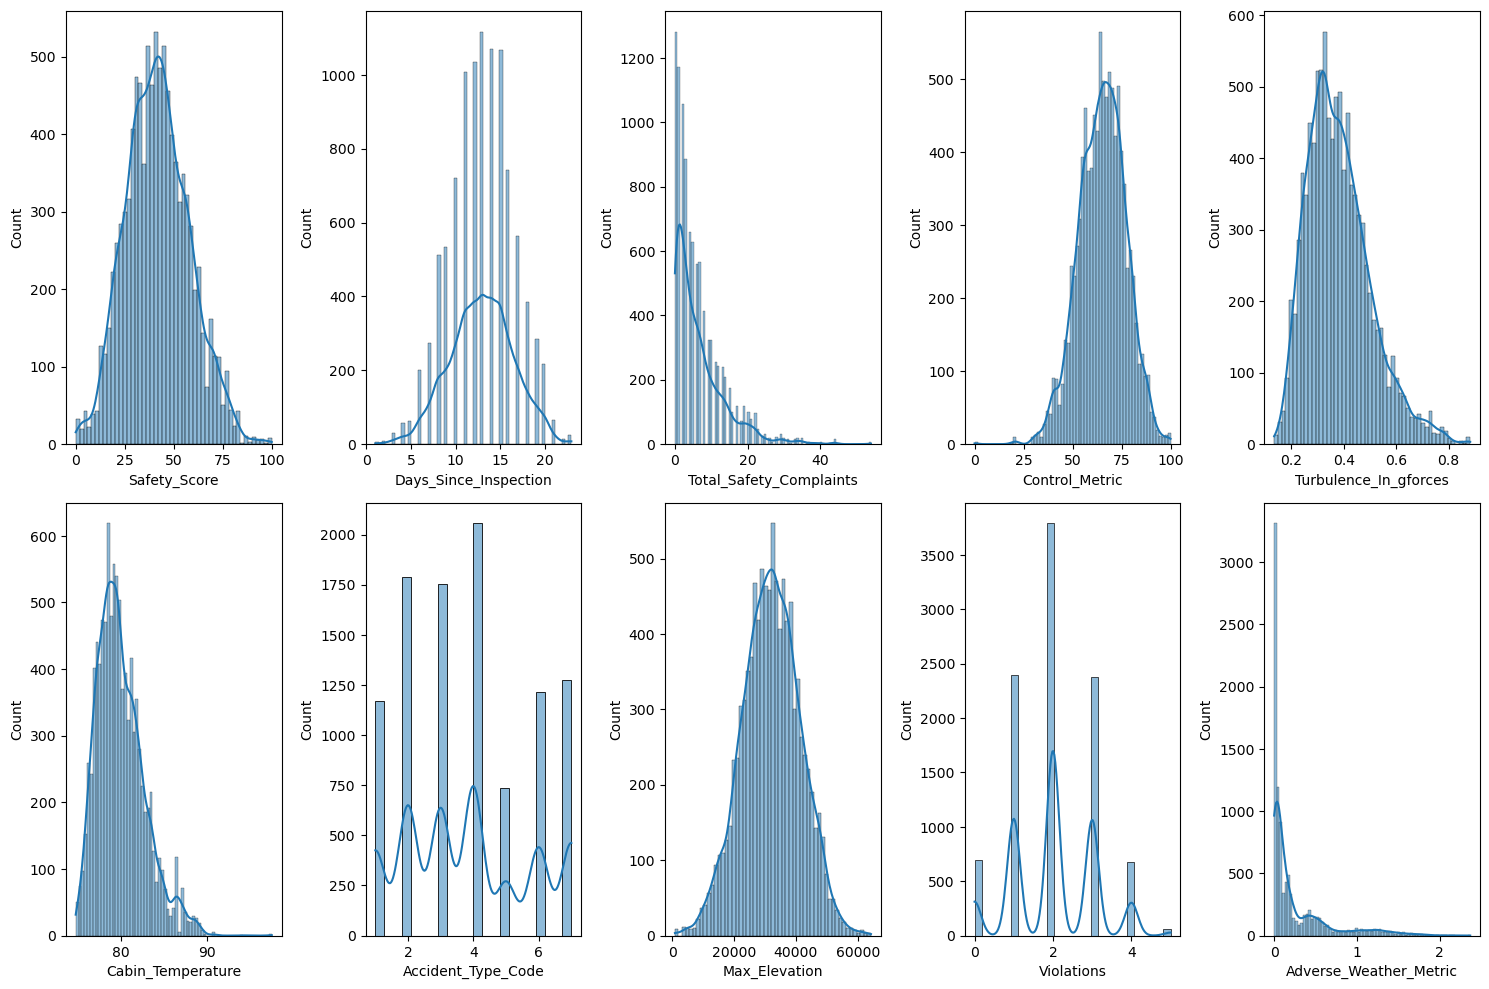

In [105]:
plt.figure(figsize=(15,10))
for i,col in enumerate(nums.columns,1):
    plt.subplot(2,5,i)
    sns.histplot(train[col],kde=True)
plt.tight_layout()
plt.show()

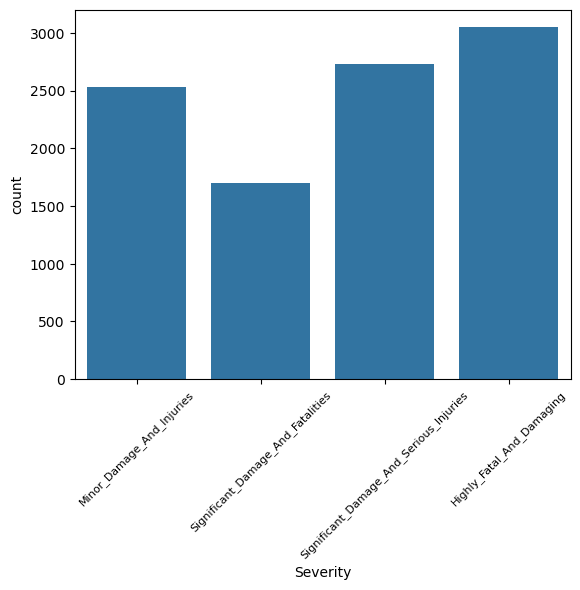

In [106]:
sns.countplot(x=train.Severity)
plt.xticks(rotation=45,fontsize=8)
plt.show()

In [107]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.000000,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.000000,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.000000,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.000000,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.000000,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.000000,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.000000,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.000000,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.000000,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.000000,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


**Encoding the target variable**

In [108]:
encoder = OrdinalEncoder(categories=[['Minor_Damage_And_Injuries', 
                                      'Significant_Damage_And_Serious_Injuries', 
                                      'Significant_Damage_And_Fatalities','Highly_Fatal_And_Damaging']])
train.Severity = encoder.fit_transform(train[['Severity']])

In [127]:
X = train.drop(['Accident_ID','Severity'],axis=1)
y = train.Severity
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [128]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [129]:
lr_model = LogisticRegression(random_state=42).fit(X_train_scaled,y_train)
y_test_pred = lr_model.predict(X_test_scaled)
print(f'Accuracy score : {accuracy_score(y_test,y_test_pred)}')

Accuracy score : 0.6435


In [130]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64       493
         1.0       0.73      0.67      0.69       583
         2.0       0.40      0.24      0.30       327
         3.0       0.68      0.81      0.74       597

    accuracy                           0.64      2000
   macro avg       0.60      0.60      0.59      2000
weighted avg       0.63      0.64      0.63      2000



**Random Forest**

In [131]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test,y_pred_rf)}\n')
print(classification_report(y_test,y_pred_rf))

Accuracy score : 0.933

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       493
         1.0       0.95      0.93      0.94       583
         2.0       0.94      0.91      0.93       327
         3.0       0.96      0.93      0.94       597

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [116]:
param_grid = {'n_estimators': [50,100,150,200],'max_depth': [None, 5, 10,20],'min_samples_split': [2,5,10,15],'min_samples_leaf': [1,2,4,6,8]}

In [119]:
grid_rf = GridSearchCV(estimator=rf_model,param_grid = param_grid,cv=5,verbose=1,n_jobs=-1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [120]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.91375


In [132]:
rf_best = RandomForestClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=2,n_estimators=200,random_state=42).fit(X_train,y_train)
y_pred_rf_best = rf_best.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test,y_pred_rf_best)}\n')
print(classification_report(y_test,y_pred_rf_best))

Accuracy score : 0.931

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92       493
         1.0       0.95      0.93      0.94       583
         2.0       0.94      0.91      0.92       327
         3.0       0.96      0.92      0.94       597

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [125]:
print(f'Accuracy score : {accuracy_score(y_train,rf_best.predict(X_train))}\n')

Accuracy score : 0.999875



**XGBoost**

In [133]:
xg_model = XGBClassifier().fit(X_train,y_train)
y_pred_xg = xg_model.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test,y_pred_xg)}\n')
print(classification_report(y_test,y_pred_xg))

Accuracy score : 0.9535

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       493
         1.0       0.95      0.95      0.95       583
         2.0       0.94      0.97      0.95       327
         3.0       0.97      0.93      0.95       597

    accuracy                           0.95      2000
   macro avg       0.95      0.96      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [134]:
print(f'Accuracy score : {accuracy_score(y_train,xg_model.predict(X_train))}\n')

Accuracy score : 1.0



In [ ]:
-------------------------------X-------------------------

In [9]:
q = int(input())

def killcode(n):
    cnt=[]
    cnter=0
    def isprime(x):
        if x < 2:
            return False
        for i in range(2, int(x**0.5) + 1):
            if x % i == 0:
                return False
        return True
        
    for j in range(1,n):
        for k in range(j+1,n):
            if j+k==n:
                cnt.append((j,k))
    return cnt
    
while q!=0:
    print(killcode(int(input())))
    q-=1

 2
 8


[(1, 7), (2, 6), (3, 5)]


 11


[(1, 10), (2, 9), (3, 8), (4, 7), (5, 6)]


In [26]:
q = int(input())

def killcode(n):
    cnt=[]
    def isprime(x):
        if x<2:
            return False
        for i in range(2,int(x**0.5+1)):
            if x%i==0:
                return False
        return True
    count = 0
    for i in range(1, n + 1):
        if isprime(i):
            for j in range(1, i // 2 + 1):
                k = i - j
                if j < k:
                    count += 1
    return count


while q!=0:
    n = int(input())
    print(killcode(n))
    q-=1

 2
 8


6


 1


0


In [17]:
    for i in range(1,n+1):
        if isprime(i):
            for j in range(1,i):
                for k in range(j+1,i):
                    if j+k==i:
                        cnt.append((j,k))
    return sum(1 for i in cnt)

5